In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

In [2]:
syn_data = pd.read_csv('C:/Users/SHUBHAM/Desktop/data.csv')

syn_frame=pd.DataFrame(syn_data)   # reading from file and creating a dataframe



In [4]:
syn_frame.head()

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1


In [5]:
syn_frame.describe()

,YEAR,Rainfall in June
count,117.000000,113.000000
mean,1958.606838,72.957522
std,33.389023,35.968989
min,1901.000000,17.700000
25%,1930.000000,48.500000
50%,1959.000000,69.900000
75%,1987.000000,90.600000
max,2015.000000,161.000000


In [6]:
syn_frame.isnull().sum()

YEAR                0
Rainfall in June    4
dtype: int64

In [8]:
syn_frame['Rainfall in June'] = syn_frame['Rainfall in June'].fillna(syn_frame['Rainfall in June'].median())

In [9]:
syn_frame.isnull().sum()

YEAR                0
Rainfall in June    0
dtype: int64

In [11]:
syn_frame.duplicated().sum()

2

In [12]:
syn_frame = syn_frame.drop_duplicates()
syn_frame.duplicated().sum()
    

0

(array([14., 14., 20., 18., 21.,  6.,  8.,  5.,  4.,  5.]),
 array([ 17.7 ,  32.03,  46.36,  60.69,  75.02,  89.35, 103.68, 118.01,
        132.34, 146.67, 161.  ]),
 <BarContainer object of 10 artists>)

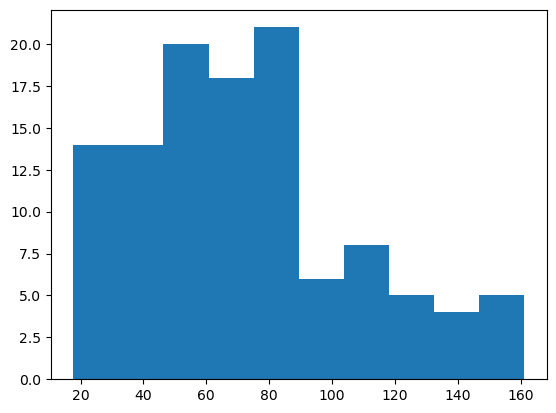

In [13]:
plt.hist(syn_frame['Rainfall in June'],bins = 10)

From histogram we can infer that data is right skewed

In [23]:
scaler = StandardScaler()


In [40]:
x1 = scaler.fit_transform(syn_frame[['YEAR']])
y1 = scaler.fit_transform(syn_frame[['Rainfall in June']]) 

print("Range of X is: {min},{max}".format(min=np.min(x1.flatten()), max=np.max(x1.flatten())))
print("Range of Y is: {min},{max}".format(min=np.min(y1.flatten()), max=np.max(y1.flatten())))

Range of X is: -1.7170544144170172,1.7170544144170172
Range of Y is: -1.5610970386628225,2.5423416713642912


In [44]:
mmscalar = MinMaxScaler();

x2 = mmscalar.fit_transform(syn_frame[['YEAR']])
y2 = mmscaler.fit_transform(syn_frame[['Rainfall in June']])


print("Range of X is: {min},{max}".format(min=np.min(x2.flatten()), max=np.max(x2.flatten())))
print("Range of Y is: {min},{max}".format(min=np.min(y2.flatten()), max=np.max(y2.flatten())))

Range of X is: 0.0,1.0
Range of Y is: 0.0,0.9999999999999999


80-20 SPLIT :-

In [46]:
X_Train,X_test,Y_Train,Y_test = train_test_split(x2,y2,test_size=0.2,random_state=40) #splitting value into training and test sets

In [48]:
model = LinearRegression().fit(X_Train,Y_Train)
y_pred = model.predict(X_test)

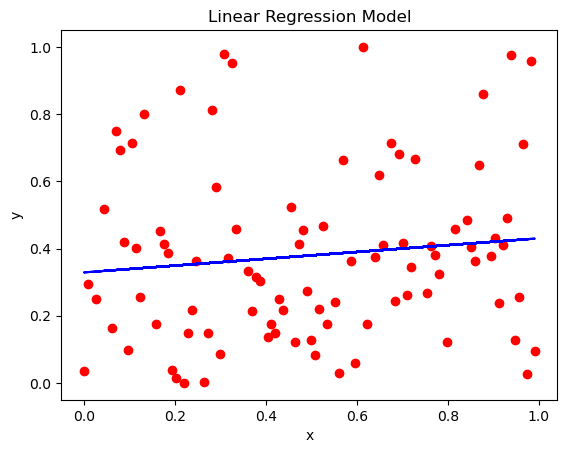

In [51]:
plt.scatter(X_Train,Y_Train,color = 'red')
plt.plot(X_Train,model.predict(X_Train), color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()

In [55]:
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(Y_test,y_pred)

print('mean squared error: {mse1}'.format(mse1 = mse))
print('root squared error: {rmse1}'.format(rmse1 = rmse))
print('mean absolute error: {mae1}'.format(mae1 = mae))


mean squared error: 0.03366735291048604
root squared error: 0.1834866559466547
mean absolute error: 0.14168805879224322


70-30 SPLIT :-

In [56]:
X_Train,X_test,Y_Train,Y_test = train_test_split(x2,y2,test_size=0.3,random_state=40) #splitting value into training and test sets

In [57]:
model = LinearRegression().fit(X_Train,Y_Train)
y_pred = model.predict(X_test)

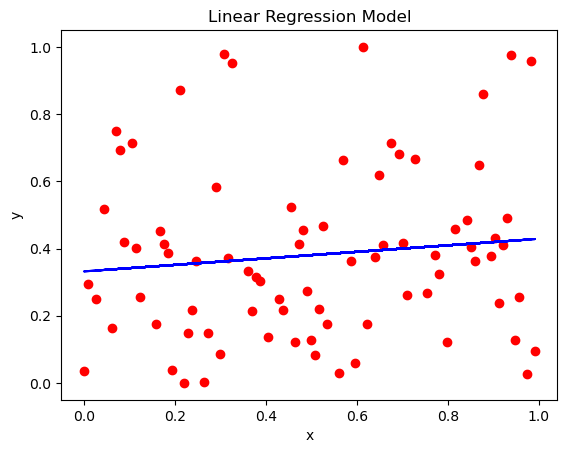

In [58]:
plt.scatter(X_Train,Y_Train,color = 'red')
plt.plot(X_Train,model.predict(X_Train), color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()

In [59]:
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(Y_test,y_pred)

print('mean squared error: {mse1}'.format(mse1 = mse))
print('root squared error: {rmse1}'.format(rmse1 = rmse))
print('mean absolute error: {mae1}'.format(mae1 = mae))


mean squared error: 0.04536703785454591
root squared error: 0.2129953939749541
mean absolute error: 0.16881924459957492
